# Generate Yeast Growth Data

This notebook generates synthetic yeast growth data representing growth in:

- `control`
- `lactose`
- `glucose`

supplemented (or not) nutrient medium.

To simulate growth data, measured by absorbance, we use the logistic equation:

$$ \textrm{absorbance} = \frac{L}{1 + \exp{(-k (x - x_0))}}$$

Where:

- $L$ = maximum absorbance (end point)
- $k$ = growth rate
- $x_0$ = time to midpoint of growth/absorbance curve

We set values of $L$, $k$, and $x_0$ separately for each experiment, including some error for each individual curve ($\epsilon_L$, $\epsilon_k$, $\epsilon_{x_0}$). The central value of $L$ varies by `control`, `lactose`, and `glucose` condition - but for $x_0$ and $k$ they are the same for all growth curves.

We also introduce an error $\epsilon$ for each individual measurement.

In [1]:
# Python imports
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Parameters
L = {"glucose": 0.56, "lactose": 0.33, "control": 0.0}  # maximum growth
x0 = 11  # time to midpoint
k = 0.5  # growth rate
baseline = 0.09  # baseline absorbance

eps_L = 0.02  # sd of error in L for the sample
eps_x0 = 0.05  # sd of error in x0 for the sample
eps_k = 0.005  # sd of error in k for the sample
eps_baseline = 0.001  # sd of error in baseline absorbance

eps = 0.005  # sd of error in measurement at each timepoint.

tot_time = 24  # hours to run experiment

BAYCOUNT = 40  # Number of bays

In [3]:
def growth_curve(tot_time, L, x0, k, eps_L, eps_x0, eps_k, eps):
    """Generate artificial growth curve data with the provided parameters."""
    abs = defaultdict(list)
    
    for medium, L_cent in L.items():
        L_val, x0_val, k_val, baseline_val = [np.random.normal(mu, sig) for mu, sig in [(L[medium], eps_L),
                                                                                        (x0, eps_x0),  # logarithmic equation
                                                                                        # (x0 * L[medium] + 4, eps_x0),  # log growth overlap
                                                                                        (k, eps_k),
                                                                                        (baseline, eps_baseline)]]
        # print(f"{medium=}, {L_val=}, {x0_val=}, {k_val=}, {baseline_val=}")
        for t in range(tot_time + 1):  # one measurement per hour
            denom = 1 + np.exp(-k_val * (t - x0_val))
            abs[medium].append(baseline_val + (L_val / denom) + np.random.normal(0, eps))

    dfdict = defaultdict(list)
    for key, val in abs.items():
        for t, abval in enumerate(val):
            dfdict["time"].append(t)
            dfdict["OD600"].append(abval)
            dfdict["medium"].append(key)
    
    return abs, dfdict

<Axes: >

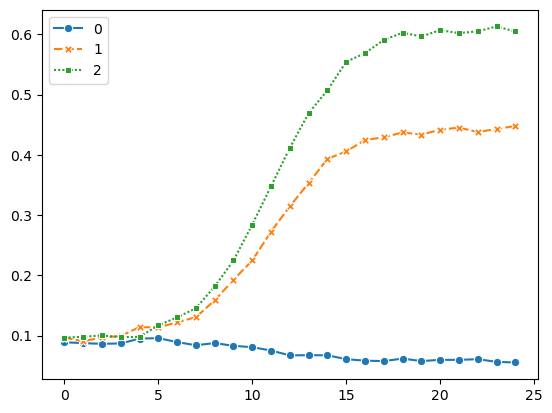

In [4]:
# Test plot with current parameters
abs, dfdict = growth_curve(tot_time, L, x0, k, eps_L, eps_x0, eps_k, eps)
arr = np.array([abs["control"], abs["lactose"], abs["glucose"]]).T
sns.lineplot(arr, markers=True)

(0.05, 6)

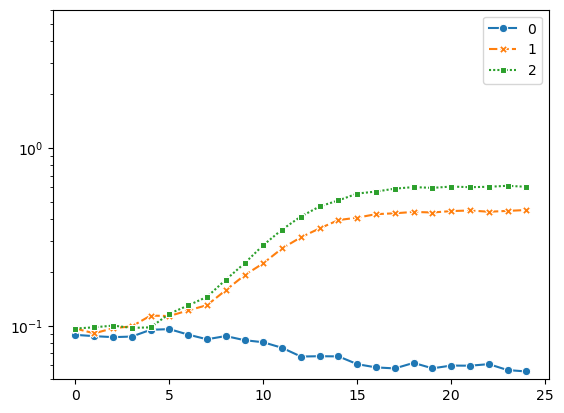

In [5]:
sns.lineplot(arr, markers=True)
plt.yscale("log")
plt.ylim(0.05, 6)

In [6]:
# Generate synthetic growth curve data, four students per bay
bay_sessions = [f"{session}_Bay_{baynum+1:02d}" for session in ("AM", "PM") for baynum in range(BAYCOUNT)]

webr_data = []

for bay_session in bay_sessions:
    for student in range(4):
        abs, dfdict = growth_curve(tot_time, L, x0, k, eps_L, eps_x0, eps_k, eps)
        fstem = f"{bay_session}_{student+1:02d}"
        opath = Path(f"../assets/data/{bay_session}/{fstem}.csv")
        opath.parents[0].mkdir(parents=True, exist_ok=True)
        dfm = pd.DataFrame.from_dict(dfdict)
        dfm.to_csv(opath, index=False)
        webr_data.append(f"download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/{bay_session}/{fstem}.csv', '{fstem}.csv')")

In [7]:
# Add the resulting code in the header of the Quarto file for the exercise
for line in webr_data:
    print(line)

download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_01/AM_Bay_01_01.csv', 'AM_Bay_01_01.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_01/AM_Bay_01_02.csv', 'AM_Bay_01_02.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_01/AM_Bay_01_03.csv', 'AM_Bay_01_03.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_01/AM_Bay_01_04.csv', 'AM_Bay_01_04.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_02/AM_Bay_02_01.csv', 'AM_Bay_02_01.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_02/AM_Bay_02_02.csv', 'AM_Bay_02_02.csv')
download.file('https://raw.githubusercontent.com/sipbs-compbiol/BM214-Workshop-3/main/assets/data/AM_Bay_02/AM_Bay_02_